## LBN 68 dR/R/dFの線形回帰
### 傾きが誤差の範囲内で0であることを期待

#### 間違えて dR/dFを計算

In [5]:
import matplotlib.pyplot as plt
import numpy as np

(0, 3)

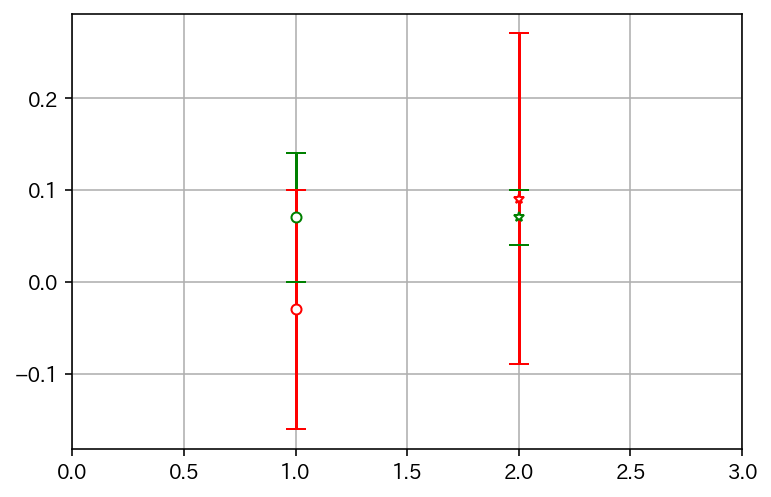

In [3]:
plt.errorbar(1, 0.07, yerr=0.07, capsize=5, fmt='o', markersize=5, ecolor='g', markeredgecolor = "g", color='w')
plt.errorbar(1, -0.03, yerr=0.13, capsize=5, fmt='o', markersize=5, ecolor='r', markeredgecolor = "r", color='w')
plt.errorbar(2, 0.07, yerr=0.03, capsize=5, fmt='*', markersize=5, ecolor='g', markeredgecolor = "g", color='w')
plt.errorbar(2, 0.09, yerr=0.18, capsize=5, fmt='*', markersize=5, ecolor='r', markeredgecolor = "r", color='w')

plt.grid()
plt.xlim(0,3)

In [91]:
x_list=np.array([1,1,2,2])
y_list=np.array([0.07,-0.03,0.07,0.09])
y_err=np.array([0.07,0.13,0.03,0.18])


In [92]:
import statsmodels.api as sm
from scipy import stats

/Users/tominaga/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1.385
Date:                Mon, 04 Oct 2021   Prob (F-statistic):              0.360
Time:                        16:48:26   Log-Likelihood:                 7.6150
No. Observations:                   4   AIC:                            -11.23
Df Residuals:                       2   BIC:                            -12.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0400      0.081     -0.496      0.6

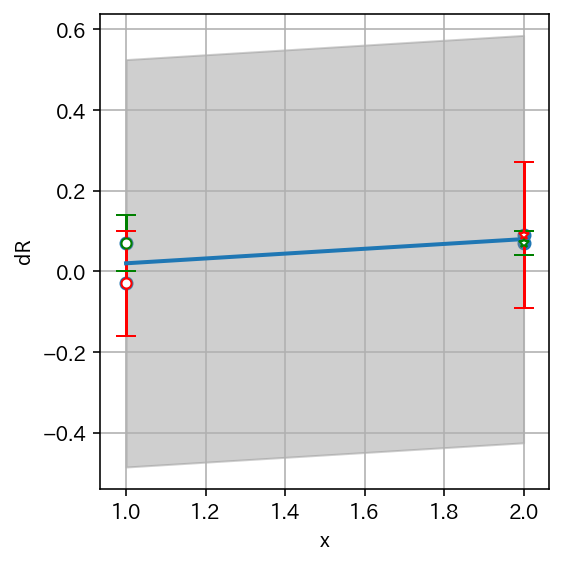

In [93]:
# Regression
X = sm.add_constant(x_list) # constant intercept term
 
# Model: y ~ a*x + c
model = sm.OLS(y_list, X)
fitted = model.fit()
x_pred = np.linspace(np.min(x_list), np.max(x_list), 2)
X_pred = sm.add_constant(x_pred)
y_pred = fitted.predict(X_pred)

#print(fitted.params)     # the estimated parameters for the regression line
print(fitted.summary())  # summary statistics for the regression

# Congfidence band
#y_hat = fitted.predict(X) # x is an array from line 12 above
#y_err = y_list - y_hat
n_data=4
mean_x = np.mean(x_list)
dof = n_data - fitted.df_model - 1 # degree of freedom
alpha = 0.025
t = stats.t.ppf(1-alpha, df=dof) # t-value
s_err = np.sum(y_err**2)
std_err = np.sqrt(s_err/(n_data-2))
std_x = np.std(x_list)
conf = t*std_err/np.sqrt(n_data)*np.sqrt(1+((x_pred-mean_x)/std_x)**2) 
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)

# Plot
plt.figure(figsize=(4, 4))
plt.scatter(x_list, y_list)
plt.plot(x_pred, y_pred, '-', linewidth=2)
plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.4)
plt.xlabel("x"); plt.ylabel("y")

plt.errorbar(1, 0.07, yerr=0.07, capsize=5, fmt='o', markersize=5, ecolor='g', markeredgecolor = "g", color='w')
plt.errorbar(1, -0.03, yerr=0.13, capsize=5, fmt='o', markersize=5, ecolor='r', markeredgecolor = "r", color='w')
plt.errorbar(2, 0.07, yerr=0.03, capsize=5, fmt='*', markersize=5, ecolor='g', markeredgecolor = "g", color='w')
plt.errorbar(2, 0.09, yerr=0.18, capsize=5, fmt='*', markersize=5, ecolor='r', markeredgecolor = "r", color='w')


plt.grid()
plt.ylabel("dR")
plt.tight_layout()
plt.show()

#### dR/R/dF を計算

chi2 =   0.876
p0 :    0.04163 +-    0.01988


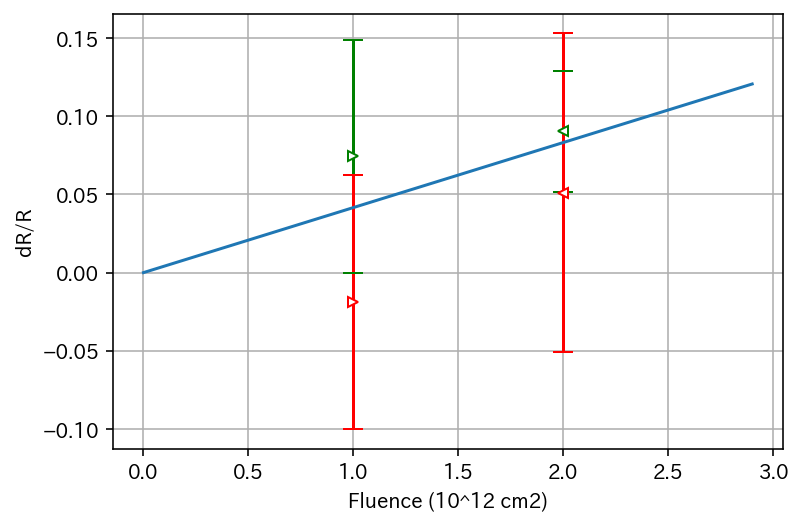

In [99]:
# データを読み込む
import numpy as np

x_list=np.array([1,1,2,2])
dr_list=np.array([0.07,-0.03,0.07,0.09])
dr_err=np.array([0.07,0.13,0.03,0.18])
r_list=np.array([0.94,1.61,0.775,1.765])
r_err=np.array([0.05,0.85,0.02,0.125])

y_list=dr_list/r_list

#誤差伝播
def err(x,y,ex,ey):
    # x/y
    return ((ex/y)**2+(x*ey/y**2)**2)**0.5

y_err=err(dr_list,r_list,dr_err,r_err)




xx = x_list
yy = y_list
ey = y_err

# フィットする関数ffを定義する
def ff(x,b):
    return b*x

# フィットして結果を表示する
from scipy.optimize import curve_fit
import math

par, cov = curve_fit(ff,xx,yy,sigma=ey)

chi2 = np.sum(((ff(xx,par[0])-yy)/ey)**2)
print("chi2 = {:7.3f}".format(chi2))
print("p0 : {:10.5f} +- {:10.5f}".format(par[0],math.sqrt(cov[0,0]/chi2*4)))
#print("p1 : {:10.5f} +- {:10.5f}".format(par[1],math.sqrt(cov[1,1]/chi2*4)))

# グラフに表示する
import matplotlib.pyplot as plt

x_func = np.arange(0,3,0.1)
#y_func = par[0]*x_func
y_func = par[0]*x_func

plt.errorbar(x_list[0], y_list[0], yerr=y_err[0], capsize=5, fmt='>', markersize=5, ecolor='g', markeredgecolor = "g", color='w')
plt.errorbar(x_list[1], y_list[1], yerr=y_err[1], capsize=5, fmt='>', markersize=5, ecolor='r', markeredgecolor = "r", color='w')
plt.errorbar(x_list[2], y_list[2], yerr=y_err[2], capsize=5, fmt='<', markersize=5, ecolor='g', markeredgecolor = "g", color='w')
plt.errorbar(x_list[3], y_list[3], yerr=y_err[3], capsize=5, fmt='<', markersize=5, ecolor='r', markeredgecolor = "r", color='w')


plt.plot(x_func,y_func)
plt.grid()
plt.ylabel("dR/R")
plt.xlabel("Fluence (10^12 cm2)")
plt.savefig("linear_fit.pdf")
plt.show()